In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
tf.set_random_seed(1)

In [3]:
BATCH_SIZE = 64
LR = 0.002
N_TEST_IMG = 5

In [4]:
mnist = input_data.read_data_sets('./mnist', one_hot=False)
test_x = mnist.test.images[:200]
test_y = mnist.test.labels[:200]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Text(0.5,1,'0')

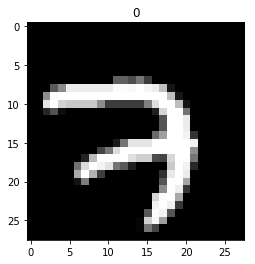

In [5]:
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))

In [6]:
tf_x = tf.placeholder(tf.float32, [None, 28*28])

In [7]:
en0 = tf.layers.dense(tf_x, 128, tf.nn.tanh)
en1 = tf.layers.dense(en0, 64, tf.nn.tanh)
en2 = tf.layers.dense(en1, 12, tf.nn.tanh)
encoded = tf.layers.dense(en2, 3)

In [8]:
de0 = tf.layers.dense(encoded, 12, tf.nn.tanh)
de1 = tf.layers.dense(de0, 64, tf.nn.tanh)
de2 = tf.layers.dense(de1, 128, tf.nn.tanh)
decoded = tf.layers.dense(de2, 28*28, tf.nn.sigmoid)

In [9]:
loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
    plt.ion() 
    
    view_data = mnist.test.images[:N_TEST_IMG]
    for i in range(N_TEST_IMG):
        a[0][i].imshow(np.reshape(view_data[i], (28, 28)), cmap='gray')
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())

    for step in range(8000):
        b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
        _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

        if step % 100 == 0:
            print('train loss: %.4f' % loss_)
            decoded_data = sess.run(decoded, {tf_x: view_data})
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.01)
    plt.ioff()

    view_data = test_x[:200]
    encoded_data = sess.run(encoded, {tf_x: view_data})
    fig = plt.figure(2); ax = Axes3D(fig)
    X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
    for x, y, z, s in zip(X, Y, Z, test_y):
        c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
    ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
    plt.show()